In [1]:
# some useful mysklearn package import statements and reloads
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import myutils
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import matplotlib.pyplot as plt

# Car Sales Classifier 

 We are going to perform some eda and use multiple classifiers to detemermine the most likely sale price of a car based on a number of classifiers. Our train set has the following attributes:  

| Attribute     | Type      | Notes                                         |
| :---          |    :----: |:---                                           |
| pricesold     | int       |Our Class label; will require discretization   |
| make          | string    |                                               |
| year          | int       |                                               |
| title status  | string    |                                               |
| mileage       | int       |                                               |
| color         | string    |                                               |
| VIN           | int       |                                               |
| Lot           | int       |                                               |



First we will import out dataset into a table 

In [2]:
auto_dataset = MyPyTable().load_from_file("used_car_sales.csv")

12025.567126902597
10.0
289990.0
[3515, 4279, 3028, 3569, 2830, 2618, 962, 301, 72, 43, 4]
[ 0  1  2  3  4  5  6  7  8  9 10]


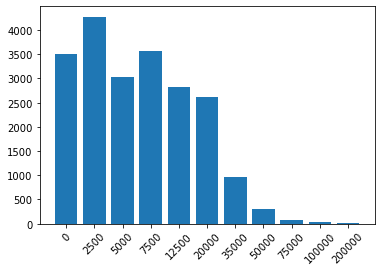

In [33]:
importlib.reload(mysklearn.myutils)
importlib.reload(myutils)

auto_dataset = myutils.clean_data(auto_dataset)
prices = auto_dataset.get_column("pricesold")
discritized_prices, ranges = myutils.discretize_sales_price(prices)
myutils.plot_prices(discritized_prices, ranges)